In [0]:
!pip install wget
import wget

In [0]:
# go to: http://bboxfinder.com

def sentinel_api(bbox, insar=True):
    insar_backend = "b4396af2-cee0-49a1-9164-4720906304e8"
    insar_layer = "IW_VV"
    true_color_backend = "be05a54f-c064-4cfa-979b-10635b344651"
    true_color_layer = "TRUE_COLOR"

    time_now = "2020-03-29/2020-05-29"
    time_1_year = "2019-03-29/2019-05-29"

    if insar:
        query_now = f"http://services.sentinel-hub.com/ogc/wms/{insar_backend}?REQUEST=GetMap&BBOX={bbox}&LAYERS={insar_layer}&MAXCC=20&WIDTH=1850&HEIGHT=980&FORMAT=image/png&TIME={time_now}"
        query_1_year = f"http://services.sentinel-hub.com/ogc/wms/{insar_backend}?REQUEST=GetMap&BBOX={bbox}&LAYERS={insar_layer}&MAXCC=20&WIDTH=1850&HEIGHT=980&FORMAT=image/png&TIME={time_1_year}"
        return (query_now, query_1_year)
    else:
        return f"http://services.sentinel-hub.com/ogc/wms/{true_color_backend}?REQUEST=GetMap&BBOX={bbox}&LAYERS={true_color_layer}&MAXCC=20&WIDTH=1850&HEIGHT=980&FORMAT=image/png&TIME={time_now}"

# kleine melm
# https://epsg.io/transform#s_srs=3857&t_srs=4326&x=597298.0483000&y=6834392.3503000

# demo_bbox = "588483.9035,6829701.0277,597298.0483,6834392.3503"
# http://bboxfinder.com/#52.1632714,5.2864408,52.18911491,5.3656197,

bbox = "588483.9035,6829701.0277,597298.0483,6834392.3503"

print(sentinel_api(bbox))
print(sentinel_api(bbox, False))

('http://services.sentinel-hub.com/ogc/wms/b4396af2-cee0-49a1-9164-4720906304e8?REQUEST=GetMap&BBOX=588483.9035,6829701.0277,597298.0483,6834392.3503&LAYERS=IW_VV&MAXCC=20&WIDTH=1850&HEIGHT=980&FORMAT=image/png&TIME=2020-03-29/2020-05-29', 'http://services.sentinel-hub.com/ogc/wms/b4396af2-cee0-49a1-9164-4720906304e8?REQUEST=GetMap&BBOX=588483.9035,6829701.0277,597298.0483,6834392.3503&LAYERS=IW_VV&MAXCC=20&WIDTH=1850&HEIGHT=980&FORMAT=image/png&TIME=2019-03-29/2019-05-29')
http://services.sentinel-hub.com/ogc/wms/be05a54f-c064-4cfa-979b-10635b344651?REQUEST=GetMap&BBOX=588483.9035,6829701.0277,597298.0483,6834392.3503&LAYERS=TRUE_COLOR&MAXCC=20&WIDTH=1850&HEIGHT=980&FORMAT=image/png&TIME=2020-03-29/2020-05-29


In [0]:
import requests

def download_image(name, url):
    response = requests.get(url)
    file = open(name, "wb")
    file.write(response.content)
    file.close()

download_image("insar_2020.png", sentinel_api(bbox)[0])
download_image("insar_2019.png", sentinel_api(bbox)[1])
download_image("truecolor.png", sentinel_api(bbox, False))

wget.download("https://raw.githubusercontent.com/sumegim/insar/master/mask_588483.png")
wget.download("https://raw.githubusercontent.com/sumegim/insar/master/map_588483.png")


'map_588483 (2).png'

In [0]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

def plot(img, title="sample_text"):
    plt.figure(figsize=(17,35))
    plt.imshow(img)
    plt.title(title)
    plt.show()

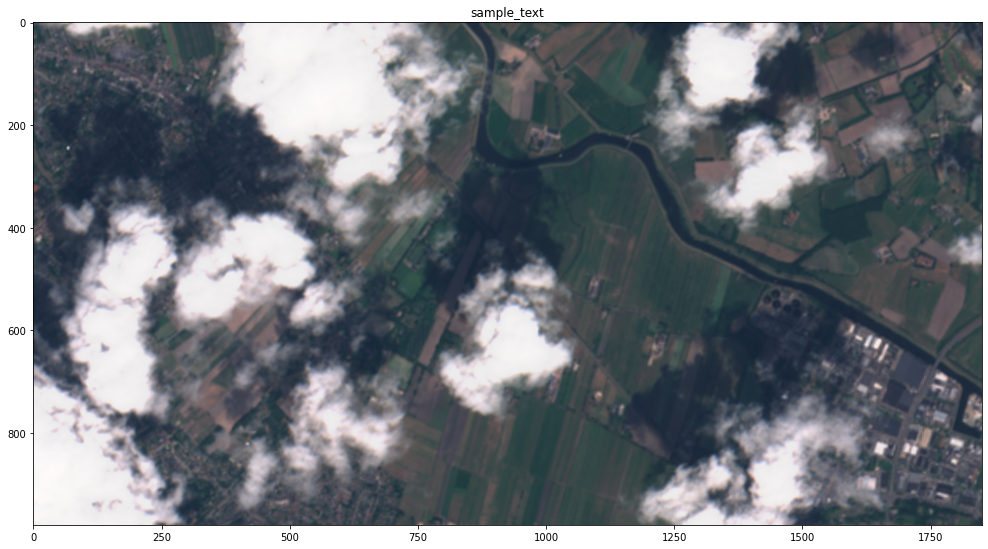

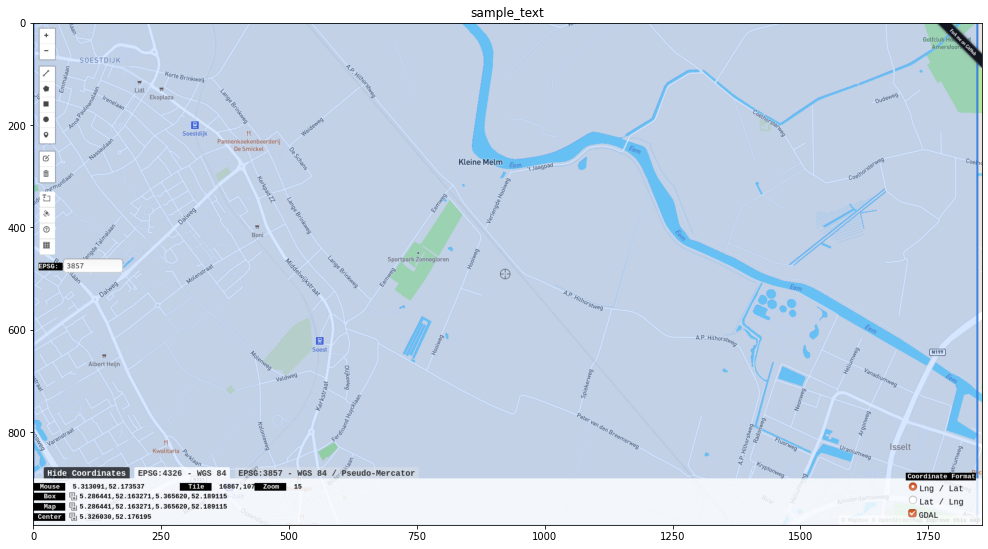

In [0]:
img_2019 = cv2.imread('insar_2019.png',0)
img_2020 = cv2.imread('insar_2020.png',0)

img_2019 = img_2019.astype(np.int16)
img_2020 = img_2020.astype(np.int16)

rgb = cv2.imread('truecolor.png',1)
demo_map = cv2.imread('map_588483.png',1)

plot(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))
plot(cv2.cvtColor(demo_map, cv2.COLOR_BGR2RGB))

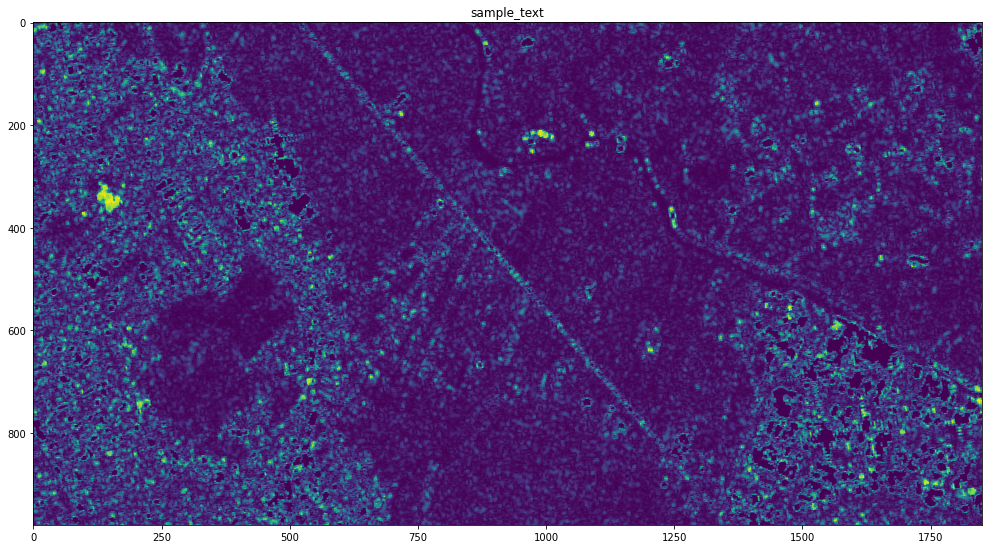

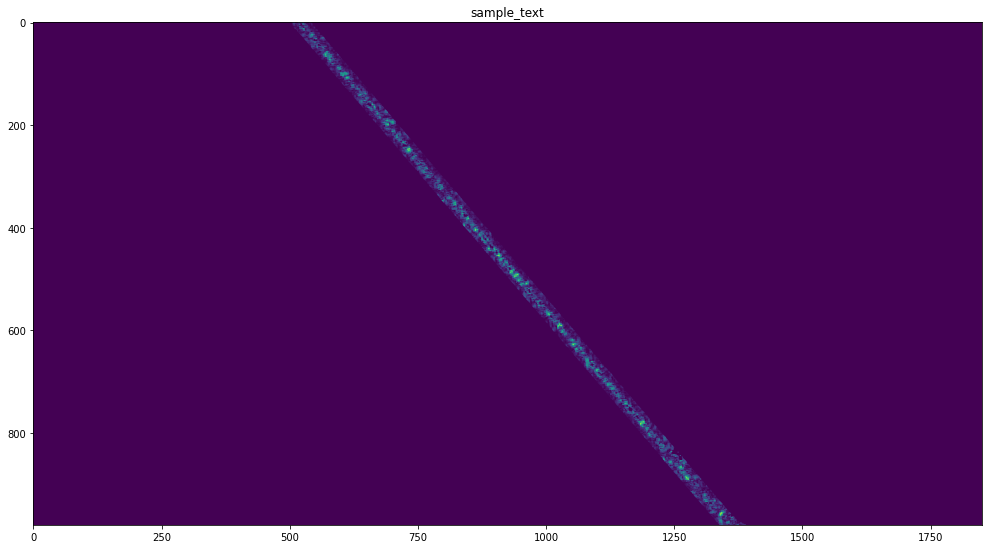

In [0]:
diff = np.absolute(img_2020 - img_2019)
# plot(img_2020, title="2020")
# plot(img_2019, title="2019")
plot(diff)

mask = cv2.imread('mask_588483.png',0)
masked = np.multiply(diff , mask/255)
plot(masked)